In [1]:

import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
from glob import glob
import re

In [2]:
def vector_dist(v1, v2): # euclidean distance between 2 points
    return math.sqrt(np.sum([(v1[i] - v2[i])**2 for i in range(len(v1))]))

true_diag = [20, 59]
true_antidiag = [36, 35]
mlen = 2 # number states

excludedvids=[1,2, 3,4,5,8,9]

In [3]:

def parser_arr(filename):
    # returns array of all traansitions and list of all class and transition thresholds
    transitions = []
    thresholds = []
    vidarrs = []
    with open(filename) as textfile:
        line = textfile.readline()
        #print('opened', line)
        while line:
            if 'Processing' in line:
                vidnum = line.split('pp_')[-1]
                vidnum = vidnum.split('.avi')[0]
                vidnum = vidnum.split('_')[0]
                vidnum = int(vidnum)
                #print(vidnum)
                line = textfile.readline()
            if 'T threshold'in line:
                thresh_set = []
                for word in line.split():
                    try:
                        thresh_set.append(float(word))
                    except ValueError:
                        pass
                    
                line = textfile.readline()
                #print('after t', line)
                if 'C threshold' in line:
                    for word in line.split():
                        try:
                            thresh_set.append(float(word))
                        except ValueError:
                            pass
                        
                
                    if len(thresholds) ==0 or thresholds[-1] != thresh_set:
                        #print(thresh_set)
                        thresholds.append(thresh_set)
                        vidnums=[]
                        vidarrs.append([[], vidnums])
                        vidsarr = np.zeros((mlen,mlen))
                        transitions.append(vidsarr)
                    else:
                        pass    
                    
                    line = textfile.readline()
                    #print('array lives here', line)
                    if '[[' in line:
                        arr = np.zeros((mlen,mlen))
                        #print(arr)
                        linenums = [int(s) for s in  re.findall(r'\d+',line)]
                        #print(linenums)
                        arr[0,:] = linenums

                        line = textfile.readline()
                        #print('array lives here', line)   

                        linenums = [int(s) for s in  re.findall(r'\d+',line)]
                        #print(linenums)
                        arr[1,:] = linenums

                        #line = textfile.readline()
                        #print('array lives here', line)   

                        #linenums = [int(s) for s in  re.findall(r'\d+',line)]
                        #print(linenums)
                        #arr[2,:] = linenums

                        transitions[-1] += arr
                        vidarrs[-1][0].append(arr)
                        vidarrs[-1][1].append(vidnum)
                        #print(arr,'\n', transitions[-1])
                    else:
                        print("missing array")
                    #print(thresholds[-1])
                else:
                    print("missing C thresh")
                
                
                    
            line = textfile.readline()
            #print(line, 'moved on')
                    
                
            
    textfile.close()
    #print(transitions, thresholds)
    return([transitions, np.array(thresholds), vidarrs]) 

In [4]:

cols = [ 'red', 'orange' ]

In [5]:

print(parser_arr(glob('./output wash*trans.txt')[0])[2][:])


[[[array([[2., 2.],
       [2., 3.]]), array([[ 6.,  1.],
       [ 0., 28.]]), array([[2., 2.],
       [1., 3.]]), array([[0., 1.],
       [1., 1.]]), array([[1., 2.],
       [2., 4.]]), array([[  2.,   4.],
       [  4., 137.]]), array([[ 2.,  2.],
       [ 3., 34.]]), array([[ 0.,  0.],
       [ 0., 10.]]), array([[0., 1.],
       [1., 7.]]), array([[0., 0.],
       [0., 4.]]), array([[ 0.,  0.],
       [ 0., 13.]]), array([[ 3.,  9.],
       [10., 24.]])], [0, 1, 10, 11, 2, 3, 4, 5, 6, 7, 8, 9]], [[array([[1., 1.],
       [1., 3.]]), array([[ 7.,  1.],
       [ 0., 19.]]), array([[2., 2.],
       [1., 2.]]), array([[0., 1.],
       [1., 1.]]), array([[1., 1.],
       [1., 4.]]), array([[  1.,   4.],
       [  4., 136.]]), array([[ 2.,  2.],
       [ 3., 27.]]), array([[ 0.,  0.],
       [ 0., 14.]]), array([[0., 0.],
       [0., 8.]]), array([[0., 0.],
       [0., 4.]]), array([[ 0.,  0.],
       [ 0., 14.]]), array([[ 4.,  7.],
       [ 8., 26.]])], [0, 1, 10, 11, 2, 3, 4, 5, 6, 7,


len indices 8
[0, 10, 11, 6, 7]
[[2. 2.]
 [2. 3.]] counts [45. 55.]
[[0. 1.]
 [1. 1.]] counts [25. 75.]
[[1. 2.]
 [2. 4.]] counts [33.33333333 66.66666667]
[[ 6.  1.]
 [ 0. 28.]] counts [42.85714286 57.14285714]
[[2. 2.]
 [1. 3.]] counts [37.5 62.5]
Total transitions:  64.0 [[11.  8.]
 [ 6. 39.]] 

[0, 10, 11, 6, 7]
[[1. 1.]
 [1. 3.]] counts [37.5 62.5]
[[0. 1.]
 [1. 1.]] counts [25. 75.]
[[1. 1.]
 [1. 4.]] counts [35. 65.]
[[ 7.  1.]
 [ 0. 19.]] counts [43.75 56.25]
[[2. 2.]
 [1. 2.]] counts [41.66666667 58.33333333]
Total transitions:  50.0 [[11.  6.]
 [ 4. 29.]] 

[0, 10, 11, 6, 7]
[[1. 1.]
 [1. 3.]] counts [37.5 62.5]
[[0. 1.]
 [1. 1.]] counts [25. 75.]
[[0. 1.]
 [1. 3.]] counts [12.5 87.5]
[[ 7.  1.]
 [ 0. 20.]] counts [43.75 56.25]
[[2. 2.]
 [1. 2.]] counts [41.66666667 58.33333333]
Total transitions:  49.0 [[10.  6.]
 [ 4. 29.]] 

[0, 10, 11, 6, 7]
[[2. 2.]
 [2. 3.]] counts [45. 55.]
[[0. 1.]
 [1. 1.]] counts [25. 75.]
[[1. 2.]
 [2. 4.]] counts [33.33333333 66.66666667]
[[ 4.  

Text(0, 0.5, 'observed probability of transition')

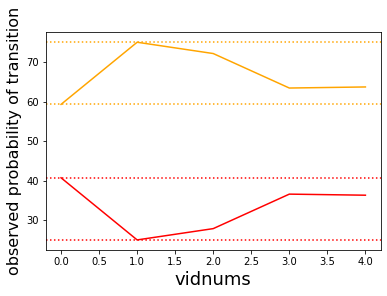

In [6]:
#broad observations array
trans_runs= parser_arr(glob('./output wash*trans.txt')[0])
def ratio(row):
    sums = np.sum(row)
    if sums > 0:
        return row/sums
    else:
        return row
    
def col_norm(array):
    cols = array.T
    cols = np.array([ratio(j)*100 for j in cols])
    return cols.T
def row_norm(array):
    rows = np.array([ratio(j)*100 for j in array])
    return rows
    
index = list(range(len(trans_runs[0])))

criteria = []
#t_thresh_list = [20, 33, 46, 60]
stored_y_values = []
c_threshes = []
t_threshes = []
vidnumset = []
print('\nlen indices', len(index))
for i in index:
    x1 = []
    x2 = []
    #x3 = []
    trans_matrices = []
    N_transitions = trans_runs[0][i]
    trans_threshes = trans_runs[1][i]
    if True:#len(trans_runs[2][i][0]) == len(vidarrs):
        vidarrs = np.array(trans_runs[2][i][0])
        vidnums = [x for x in trans_runs[2][i][1] if x not in excludedvids]
        print(vidnums)
        inds=np.argsort(vidnums)
        #print(inds)
        vidarrs = vidarrs[inds]
        #print(row_norm(vidarrs))
        #vidarrs = np.cumsum(vidarrs, axis=0)
        vidnums = list(range(len(vidarrs)))
        #print(vidnums)
        for vidnum in vidnums: 
            T_obb = vidarrs[vidnum]
            trans_matrices.append(T_obb)
            T_obb_norm = np.vstack([ratio(T_obb[i]) for i in range(len(T_obb))])
            #print(T_obb, '\n', np.around(T_obb_norm, 2), np.sum(T_obb_norm, axis=1))
            eigvals, eigvecs = np.linalg.eig(T_obb_norm.T)
            eig_one_index = [x for x in range(len(eigvals)) if eigvals[x]==max(eigvals)][0]
            eigvec_one = eigvecs[:, eig_one_index]
            evec_one = eigvec_one*100 / np.sum(eigvec_one)
            counts =  ratio(np.sum(T_obb_norm, axis=0))*100#/np.sum(T_obb_norm)
            print(T_obb, 'counts', counts)
            #print('\n y values incoming from e_vector\n',evec_one, np.sum(T_obb_norm, axis=0)*100/np.sum(T_obb_norm), 
                  #np.sum(T_obb, axis=0))
            x1.append(counts[0])
            x2.append(counts[1])
            #x3.append(counts[2])
        t_threshes.append(trans_threshes[0])
        c_threshes.append(trans_threshes[1])
        criteria.append(str(int(trans_threshes[0]))+','+str(int(trans_threshes[1])))
        stored_y_values.append([x1,x2])#,x3])
        print('Total transitions: ',np.sum(vidarrs), np.sum(vidarrs, axis=0), '\n')
#print(t_threshes,c_threshes)    

# Print probabilitie sby video
#stored_y_values = [stored_y_values[x] for x in range(len(stored_y_values))]
stored_y_values = [z for z in stored_y_values if len(z[0]) == len(stored_y_values[0][0])] #np.array(stored_y_values)
print('\nstored_y_values',stored_y_values,'\n', len(stored_y_values), len(stored_y_values[0]), len(stored_y_values[0][1]),stored_y_values[0][1])
y_values_selected = np.array(np.sum(stored_y_values, axis=0))
y_values_selected = col_norm(y_values_selected)
print('\n','\nsummed y values\n', y_values_selected, '\n', len(y_values_selected), len(y_values_selected[0]))
y1,y2 = y_values_selected 
print('\nvidnums',vidnums,y1,y2)#,y3)
vidnums = list(range(len(y1)))
fig,ax = plt.subplots()
print('\n',len(vidnums), len(y1))        
plt.plot(vidnums, y1, c = cols[0], ls = '-')
plt.plot(vidnums, y2, c = cols[1], ls = '-')
#plt.plot(vidnums, y3, c = cols[2], ls = '-')

plt.axhline(y=min(y1), c = cols[0], ls = ':')
plt.axhline(y=min(y2), c = cols[1], ls = ':')
#plt.axhline(y=min(y3), c = cols[2], ls = ':')
plt.axhline(y=max(y1), c = cols[0], ls = ':')
plt.axhline(y=max(y2), c = cols[1], ls = ':')
#plt.axhline(y=max(y3), c = cols[2], ls = ':')
plt.xlabel('vidnums', fontsize=18)
plt.ylabel('observed probability of transition', fontsize=16)
    
    
#Print probabilities by v threshold
    
    
    
# Printprobabilities by video

[15.0, 22.0, 30.0] [33.13492063492063, 34.803113553113555, 31.160714285714292] [66.86507936507937, 65.19688644688645, 68.83928571428571]
3 3


Text(0, 0.5, 'observed probability of transition')

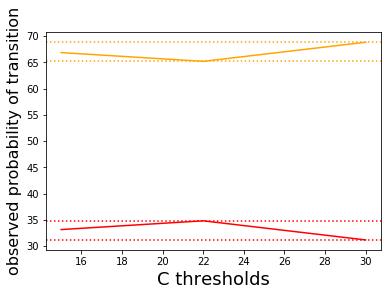

In [7]:
index = list(range(len(trans_runs[0])))

criteria = []
#t_thresh_list = [20, 33, 46, 60]
stored_y_values = []
c_threshes = []
t_threshes = []
for i in index:
    x1 = []
    x2 = []
    #x3 = []
    trans_matrices = []
    N_transitions = trans_runs[0][i]
    trans_threshes = trans_runs[1][i]
    vidarrs = np.array(trans_runs[2][i][0])
    vidnums = [x for x in trans_runs[2][i][1] if x not in excludedvids]
    #print(vidnums)
    inds=np.argsort(vidnums)
    #print(inds)
    vidarrs = vidarrs[inds]
    #print(vidarrs)
    #vidarrs = np.cumsum(vidarrs, axis=0)
    vidnums = list(range(len(vidarrs)))
    for vidnum in vidnums: 
        T_obb = vidarrs[vidnum]
        trans_matrices.append(T_obb)
        T_obb_norm = np.vstack([ratio(T_obb[i]) for i in range(len(T_obb))])
        #print(T_obb, '\n', np.around(T_obb_norm, 2), np.sum(T_obb_norm, axis=1))
        eigvals, eigvecs = np.linalg.eig(T_obb_norm.T)
        eig_one_index = [x for x in range(len(eigvals)) if eigvals[x]==max(eigvals)][0]
        eigvec_one = eigvecs[:, eig_one_index]
        evec_one = eigvec_one*100 / np.sum(eigvec_one)
        counts =  ratio(np.sum(T_obb_norm, axis=0))*100#/np.sum(T_obb_norm)
        #print('\n y values incoming from e_vector\n',evec_one, np.sum(T_obb_norm, axis=0)*100/np.sum(T_obb_norm), 
              #np.sum(T_obb, axis=0))
        x1.append(counts[0])
        x2.append(counts[1])
        #x3.append(counts[2])
    if len(x1) == len(vidnums):
        #vidarrs = np.cumsum(vidarrs, axis=0)
        t_threshes.append(trans_threshes[0])
        c_threshes.append(trans_threshes[1])
        criteria.append(str(int(trans_threshes[0]))+','+str(int(trans_threshes[1])))
        stored_y_values.append([x1,x2])#,x3])
#print(t_threshes,c_threshes)    

# Print probabilitie sby c threshold
stored_y_values = np.array(stored_y_values)
cs = list(set(c_threshes))
list.sort(cs)
#print('\n', stored_y_values, '\n', c_threshes, '\n', cs, '\n')
y1 = []
y2 = []
#y3 = []
for j in cs:
    inds = np.where(np.array(c_threshes) == j)
    y_values_selected = stored_y_values[inds] # matrix where each row is a t,c that includes the particular c threshold as the c
    #print('\noriginal y values\n', y_values_selected)
    y_values_selected = np.sum(y_values_selected, axis=0)
    #print('\nsummed y values\n',j, y_values_selected)    
    collected_value_across_all_vids = ratio([sum(i) for i in y_values_selected])*100
    #y1,y2,y3 = y_values_selected # one y value per video, and all only for this c threshold, summed over the t thresholds used
    #print(collected_value_across_all_vids, sum(collected_value_across_all_vids))
    y1.append(collected_value_across_all_vids[0])
    y2.append(collected_value_across_all_vids[1])
    #y3.append(collected_value_across_all_vids[2])
print(cs,y1,y2)
fig,ax = plt.subplots()
print(len(cs), len(y1))        
plt.plot(cs, y1, c = cols[0], ls = '-')
plt.plot(cs, y2, c = cols[1], ls = '-')
#plt.plot(cs, y3, c = cols[2], ls = '-')

plt.axhline(y=min(y1), c = cols[0], ls = ':')
plt.axhline(y=min(y2), c = cols[1], ls = ':')
#plt.axhline(y=min(y3), c = cols[2], ls = ':')
plt.axhline(y=max(y1), c = cols[0], ls = ':')
plt.axhline(y=max(y2), c = cols[1], ls = ':')
#plt.axhline(y=max(y3), c = cols[2], ls = ':')
plt.xlabel('C thresholds', fontsize=18)
plt.ylabel('observed probability of transition', fontsize=16)
    
    
#Print probabilities by v threshold
    
    
    
# Printprobabilities by video

[30.0, 40.0, 50.0] [35.13492063492063, 33.43650793650794, 29.062500000000004] [64.86507936507937, 66.56349206349206, 70.9375]
3 3


Text(0, 0.5, 'observed probability of transition')

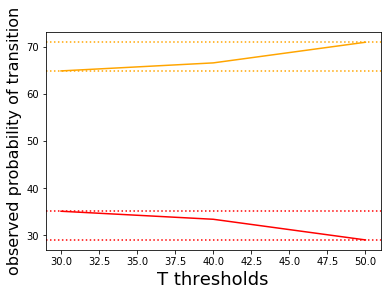

In [8]:
index = list(range(len(trans_runs[0])))

criteria = []
#t_thresh_list = [20, 33, 46, 60]
stored_y_values = []
c_threshes = []
t_threshes = []
for i in index:
    x1 = []
    x2 = []
    x3 = []
    trans_matrices = []
    N_transitions = trans_runs[0][i]
    trans_threshes = trans_runs[1][i]
    vidarrs = np.array(trans_runs[2][i][0])
    vidnums = [x for x in trans_runs[2][i][1] if x not in excludedvids]
    #print(vidnums)
    inds=np.argsort(vidnums)
    #print(inds)
    vidarrs = vidarrs[inds]
    #print(vidarrs)
    #vidarrs = np.cumsum(vidarrs, axis=0)
    vidnums = list(range(len(vidarrs)))
    for vidnum in vidnums: 
        T_obb = vidarrs[vidnum]
        trans_matrices.append(T_obb)
        T_obb_norm = np.vstack([ratio(T_obb[i]) for i in range(len(T_obb))])
        #print(T_obb, '\n', np.around(T_obb_norm, 2), np.sum(T_obb_norm, axis=1))
        eigvals, eigvecs = np.linalg.eig(T_obb_norm.T)
        eig_one_index = [x for x in range(len(eigvals)) if eigvals[x]==max(eigvals)][0]
        eigvec_one = eigvecs[:, eig_one_index]
        evec_one = eigvec_one*100 / np.sum(eigvec_one)
        counts =  ratio(np.sum(T_obb_norm, axis=0))*100#/np.sum(T_obb_norm)
        #print('\n y values incoming from e_vector\n',evec_one, np.sum(T_obb_norm, axis=0)*100/np.sum(T_obb_norm), 
              #np.sum(T_obb, axis=0))
        x1.append(counts[0])
        x2.append(counts[1])
        #x3.append(counts[2])
    if len(x1) == len(vidnums):
        t_threshes.append(trans_threshes[0])
        c_threshes.append(trans_threshes[1])
        criteria.append(str(int(trans_threshes[0]))+','+str(int(trans_threshes[1])))
        stored_y_values.append([x1,x2])#,x3])
#print(t_threshes,c_threshes)    

# Print probabilitie sby t threshold
stored_y_values = np.array(stored_y_values)
ts = list(set(t_threshes))
list.sort(ts)
#print('\n', stored_y_values, '\n', c_threshes, '\n', cs, '\n')
y1 = []
y2 = []
#y3 = []
for j in ts:
    inds = np.where(np.array(t_threshes) == j)
    y_values_selected = stored_y_values[inds] # matrix where each row is a t,c that includes the particular c threshold as the c
    #print('\noriginal y values\n', y_values_selected)
    y_values_selected = np.sum(y_values_selected, axis=0)
    #print('\nsummed y values\n',j, y_values_selected)    
    collected_value_across_all_vids = ratio([sum(i) for i in y_values_selected])*100
    #y1,y2,y3 = y_values_selected # one y value per video, and all only for this c threshold, summed over the t thresholds used
    #print(collected_value_across_all_vids, sum(collected_value_across_all_vids))
    y1.append(collected_value_across_all_vids[0])
    y2.append(collected_value_across_all_vids[1])
    #y3.append(collected_value_across_all_vids[2])
print(ts,y1,y2)
fig,ax = plt.subplots()
print(len(ts), len(y1))        
plt.plot(ts, y1, c = cols[0], ls = '-')
plt.plot(ts, y2, c = cols[1], ls = '-')
#plt.plot(ts, y3, c = cols[2], ls = '-')

plt.axhline(y=min(y1), c = cols[0], ls = ':')
plt.axhline(y=min(y2), c = cols[1], ls = ':')
#plt.axhline(y=min(y3), c = cols[2], ls = ':')
plt.axhline(y=max(y1), c = cols[0], ls = ':')
plt.axhline(y=max(y2), c = cols[1], ls = ':')
#plt.axhline(y=max(y3), c = cols[2], ls = ':')
plt.xlabel('T thresholds', fontsize=18)
plt.ylabel('observed probability of transition', fontsize=16)
    
    
#Print probabilities by v threshold
    
    
    
# Printprobabilities by video


len indices 8
[0, 10, 11, 6, 7]
[0, 10, 11, 6, 7]
[0, 10, 11, 6, 7]
[0, 10, 11, 6, 7]
[0, 10, 11, 6, 7]
[0, 10, 11, 6, 7]
[0, 10, 11, 6, 7]
[0, 10, 11]
criteria ['30,15', '30,22', '30,30', '40,15', '40,22', '40,30', '50,15', '50,22']

stored_y_values [[[45.0, 25.0, 33.33333333333333, 42.857142857142854, 37.5], [55.00000000000001, 75.0, 66.66666666666666, 57.14285714285714, 62.5]], [[37.5, 25.0, 35.0, 43.75, 41.66666666666667], [62.5, 75.0, 65.0, 56.25, 58.333333333333336]], [[37.5, 25.0, 12.5, 43.75, 41.66666666666667], [62.5, 75.0, 87.5, 56.25, 58.333333333333336]], [[45.0, 25.0, 33.33333333333333, 40.0, 33.33333333333333], [55.00000000000001, 75.0, 66.66666666666666, 60.0, 66.66666666666666]], [[37.5, 25.0, 35.0, 42.857142857142854, 33.33333333333333], [62.5, 75.0, 65.0, 57.14285714285714, 66.66666666666666]], [[37.5, 25.0, 12.5, 42.857142857142854, 33.33333333333333], [62.5, 75.0, 87.5, 57.14285714285714, 66.66666666666666]], [[45.0, 25.0, 33.33333333333333, 0.0, 33.33333333333333]

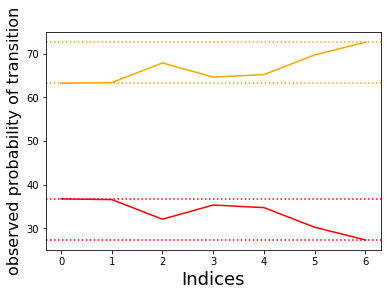

In [9]:
index = list(range(len(trans_runs[0])))
def row_norm(array):
    rows = np.array([ratio(j)*100 for j in array])
    return rows
criteria = []
#t_thresh_list = [20, 33, 46, 60]
stored_y_values = []
c_threshes = []
t_threshes = []
vidnumset = []
print('\nlen indices', len(index))
for i in index:
    x1 = []
    x2 = []
    #x3 = []
    trans_matrices = []
    N_transitions = trans_runs[0][i]
    trans_threshes = trans_runs[1][i]
    if True:#len(trans_runs[2][i][0]) == len(vidarrs):
        vidarrs = np.array(trans_runs[2][i][0])
        vidnums = [x for x in trans_runs[2][i][1] if x not in excludedvids]
        print(vidnums)
        inds=np.argsort(vidnums)
        #print(inds)
        vidarrs = vidarrs[inds]
        #print(vidarrs)
        #vidarrs = np.cumsum(vidarrs, axis=0)
        vidnums = list(range(len(vidarrs)))
        #print(vidnums)
        for vidnum in vidnums: 
            T_obb = vidarrs[vidnum]
            trans_matrices.append(T_obb)
            T_obb_norm = np.vstack([ratio(T_obb[i]) for i in range(len(T_obb))])
            #print(T_obb, '\n', np.around(T_obb_norm, 2), np.sum(T_obb_norm, axis=1))
            eigvals, eigvecs = np.linalg.eig(T_obb_norm.T)
            eig_one_index = [x for x in range(len(eigvals)) if eigvals[x]==max(eigvals)][0]
            eigvec_one = eigvecs[:, eig_one_index]
            evec_one = eigvec_one*100 / np.sum(eigvec_one)
            counts =  ratio(np.sum(T_obb_norm, axis=0))*100#/np.sum(T_obb_norm)
            #print('counts', counts)
            #print('\n y values incoming from e_vector\n',evec_one, np.sum(T_obb_norm, axis=0)*100/np.sum(T_obb_norm), 
                  #np.sum(T_obb, axis=0))
            x1.append(counts[0])
            x2.append(counts[1])
            #x3.append(counts[2])
        t_threshes.append(trans_threshes[0])
        c_threshes.append(trans_threshes[1])
        criteria.append(str(int(trans_threshes[0]))+','+str(int(trans_threshes[1])))
        stored_y_values.append([x1,x2])#,x3])
#print(t_threshes,c_threshes)    
print('criteria', criteria)
# Print probabilitie sby video
#stored_y_values = [stored_y_values[x] for x in range(len(stored_y_values))]
stored_y_values = [z for z in stored_y_values if len(z[0]) == len(stored_y_values[0][0])] #np.array(stored_y_values)
print('\nstored_y_values',stored_y_values,'\n', len(stored_y_values), len(stored_y_values[0]), len(stored_y_values[0][1]),stored_y_values[0][1])
y_values_selected = np.array(np.sum(stored_y_values, axis=2))
print(y_values_selected)
y_values_selected = row_norm(y_values_selected)
print('\n','\nsummed y values\n', y_values_selected, y_values_selected.T,'\n', len(y_values_selected), len(y_values_selected[0]))
y1,y2 = y_values_selected.T 

fig,ax = plt.subplots()
print(len(criteria), len(y1))   
ts = list(range(len(y1)))
plt.plot(ts, y1, c = cols[0], ls = '-')
plt.plot(ts, y2, c = cols[1], ls = '-')
#plt.plot(ts, y3, c = cols[2], ls = '-')

plt.axhline(y=min(y1), c = cols[0], ls = ':')
plt.axhline(y=min(y2), c = cols[1], ls = ':')
#plt.axhline(y=min(y3), c = cols[2], ls = ':')
plt.axhline(y=max(y1), c = cols[0], ls = ':')
plt.axhline(y=max(y2), c = cols[1], ls = ':')
#plt.axhline(y=max(y3), c = cols[2], ls = ':')
plt.xlabel('Indices', fontsize=18)
plt.ylabel('observed probability of transition', fontsize=16)


v1 = y1
v2 = y2

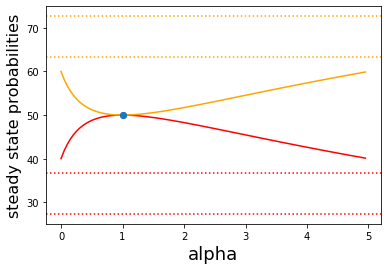

In [16]:
##### "tESTING HYPOTHESIS WITH all 2 positions for particle to swing to"
#narrow observations array
#narrow observations array
alphas = np.linspace(0, 5, 100,endpoint =False)
#betas = np.linspace(0, 20, 100,endpoint =False)
x1 = []
x2 = []
for i in alphas:
    #print('\nalpha = %s' %i)
    T_expected_narrow = np.asarray([[4*i, 2*(i + 1)],
     [4, 2*(i+1)]])
    T_expected_broad = T_expected_narrow
    T_expected_broad_norm = np.vstack([T_expected_broad[i]/np.sum(T_expected_broad[i]) for i in range(len(T_expected_broad))])
    #print(T_expected_broad_norm, '\n\n', np.around(T_expected_broad_norm, 2))
    eigvals, eigvecs = np.linalg.eig(T_expected_broad_norm.T)
    eig_one_index = [x for x in range(len(eigvals)) if math.isclose(eigvals[x], 1.0, abs_tol = .0001)][0]
    eigvec_one = eigvecs[:, eig_one_index]
    evec_one = eigvec_one*100 / np.sum(eigvec_one)
    #print("Eigenvector for eigenvalue 1 of T_ob_norm:")
    #print(evec_one)
    #plt.plot((i, i, i), (evec_one), 'x')
    x1.append(evec_one[0])
    x2.append(evec_one[1])
#print(alpha1,beta1)
fig,ax = plt.subplots()
plt.plot(alphas, x1, c = cols[0], ls = '-')
plt.plot(alphas, x2, c = cols[1], ls = '-')
#plt.plot(alphas, [x[beta1] for x in x3], c =  cols[2], ls = '-')

plt.axhline(y=min(v1), c = cols[0], ls = ':')
plt.axhline(y=min(v2), c =  cols[1], ls = ':')
#plt.axhline(y=min(v3), c = cols[2], ls = ':')
plt.axhline(y=max(v1), c = cols[0], ls = ':')
plt.axhline(y=max(v2), c =  cols[1], ls = ':')
#plt.axhline(y=max(v3), c = cols[2], ls = ':')
plt.xlabel('alpha', fontsize=18)
plt.ylabel('steady state probabilities', fontsize=16)
#plt.plot((1, 1, 1),(23, 42, 35), 'x')
plt.plot((1, 1),(50,50), 'o')


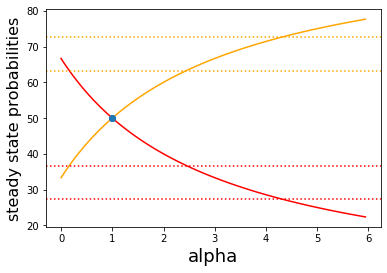

In [17]:
"tESTING HYPOTHESIS WITH all position, early state unimportant, end sate proportional to bond strengths"
#narrow observations array
alphas = np.linspace(0, 6, 100,endpoint =False)
#betas = np.linspace(0, 20, 100,endpoint =False)
x1 = []
x2 = []
for i in alphas:
    #print('\nalpha = %s' %i)
    T_expected_narrow = np.asarray([[2, i + 1],
     [4/(i+1), 2]])
    T_expected_broad = T_expected_narrow
    T_expected_broad_norm = np.vstack([T_expected_broad[i]/np.sum(T_expected_broad[i]) for i in range(len(T_expected_broad))])
    #print(T_expected_broad_norm, '\n\n', np.around(T_expected_broad_norm, 2))
    eigvals, eigvecs = np.linalg.eig(T_expected_broad_norm.T)
    eig_one_index = [x for x in range(len(eigvals)) if math.isclose(eigvals[x], 1.0, abs_tol = .0001)][0]
    eigvec_one = eigvecs[:, eig_one_index]
    evec_one = eigvec_one*100 / np.sum(eigvec_one)
    #print("Eigenvector for eigenvalue 1 of T_ob_norm:")
    #print(evec_one)
    #plt.plot((i, i, i), (evec_one), 'x')
    x1.append(evec_one[0])
    x2.append(evec_one[1])
#print(alpha1,beta1)
fig,ax = plt.subplots()
plt.plot(alphas, x1, c = cols[0], ls = '-')
plt.plot(alphas, x2, c = cols[1], ls = '-')
#plt.plot(alphas, [x[beta1] for x in x3], c =  cols[2], ls = '-')

plt.axhline(y=min(v1), c = cols[0], ls = ':')
plt.axhline(y=min(v2), c =  cols[1], ls = ':')
#plt.axhline(y=min(v3), c = cols[2], ls = ':')
plt.axhline(y=max(v1), c = cols[0], ls = ':')
plt.axhline(y=max(v2), c =  cols[1], ls = ':')
#plt.axhline(y=max(v3), c = cols[2], ls = ':')
plt.xlabel('alpha', fontsize=18)
plt.ylabel('steady state probabilities', fontsize=16)
#plt.plot((1, 1, 1),(23, 42, 35), 'x')
plt.plot((1, 1),(50,50), 'o')



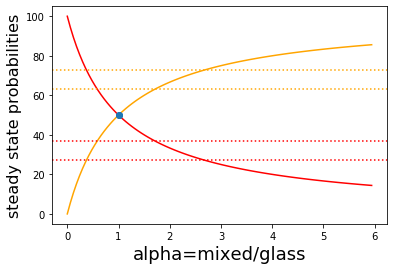

In [18]:
"tESTING HYPOTHESIS WITH all position, early state unimportant, end sate proportional to bond strengths"
#narrow observations array
alphas = np.linspace(0, 6, 100,endpoint =False)
#betas = np.linspace(0, 20, 100,endpoint =False)
x1 = []
x2 = []
for i in alphas:
    #print('\nalpha = %s' %i)
    t = (2/((1+i)*(2+2*i))+
         4*i/((1+i)*(2+2*i)*(4+2*i))+
          2*i/((1+i)*(4+2*i)))
    #print(bm)
    c = (2*i/((1+i)*(4+2*i))+
          i*(2+2*i)/((1+i)*(4+2*i)))
    
    T_expected_narrow = np.asarray([[t, c],
     [t, c]])
    T_expected_broad = T_expected_narrow
    T_expected_broad_norm = np.vstack([T_expected_broad[i]/np.sum(T_expected_broad[i]) for i in range(len(T_expected_broad))])
    #print(T_expected_broad_norm, '\n\n', np.around(T_expected_broad_norm, 2))
    eigvals, eigvecs = np.linalg.eig(T_expected_broad_norm.T)
    eig_one_index = [x for x in range(len(eigvals)) if math.isclose(eigvals[x], 1.0, abs_tol = .0001)][0]
    eigvec_one = eigvecs[:, eig_one_index]
    evec_one = eigvec_one*100 / np.sum(eigvec_one)
    #print("Eigenvector for eigenvalue 1 of T_ob_norm:")
    #print(evec_one)
    #plt.plot((i, i, i), (evec_one), 'x')
    x1.append(evec_one[0])
    x2.append(evec_one[1])
#print(alpha1,beta1)
fig,ax = plt.subplots()
plt.plot(alphas, x1, c = cols[0], ls = '-')
plt.plot(alphas, x2, c = cols[1], ls = '-')
#plt.plot(alphas, [x[beta1] for x in x3], c =  cols[2], ls = '-')

plt.axhline(y=min(v1), c = cols[0], ls = ':')
plt.axhline(y=min(v2), c =  cols[1], ls = ':')
#plt.axhline(y=min(v3), c = cols[2], ls = ':')
plt.axhline(y=max(v1), c = cols[0], ls = ':')
plt.axhline(y=max(v2), c =  cols[1], ls = ':')
#plt.axhline(y=max(v3), c = cols[2], ls = ':')
plt.xlabel('alpha=mixed/glass', fontsize=18)
plt.ylabel('steady state probabilities', fontsize=16)
#plt.plot((1, 1, 1),(23, 42, 35), 'x')
plt.plot((1, 1),(50,50), 'o')



[(27.333333333333336, 36.738095238095234), (63.261904761904766, 72.66666666666667)]


Text(0.5, 0, 'proprtion of hinge motion')

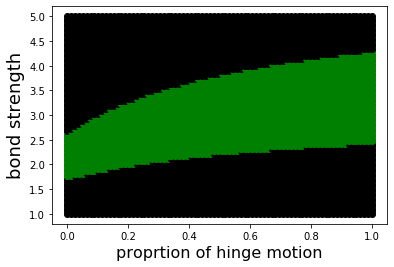

In [24]:
#narrow observations array
fig, ax = plt.subplots()
alphas = np.linspace(1, 5, 80)
ratios = np.linspace(0, 1, 80)
tolerances = [(min(v1), max(v1)), (min(v2), max(v2))]
print(tolerances)


for i in alphas:
    for r in ratios:
        #print('\nalpha = %s' %i)
        #print(tm)
        t = (2/((1+i)*(2+2*i))+
         4*i/((1+i)*(2+2*i)*(4+2*i))+
          2*i/((1+i)*(4+2*i)))
        #print(bm)
        c = (2*i/((1+i)*(4+2*i))+
              i*(2+2*i)/((1+i)*(4+2*i)))

        T2 = np.asarray([[t, c],
         [t, c]])
        T1 = np.asarray([[2, i + 1],
         [4/(i+1), 2]])
        T_expected_narrow = r*T1 + (1-r)*T2
        #print(T_expected_narrow)
        T_expected_broad = T_expected_narrow
        T_expected_broad_norm = np.vstack([T_expected_broad[i]/np.sum(T_expected_broad[i]) for i in range(len(T_expected_broad))])
        #print(T_expected_broad_norm, '\n\n', np.around(T_expected_broad_norm, 2))
        eigvals, eigvecs = np.linalg.eig(T_expected_broad_norm.T)
        eig_one_index = [x for x in range(len(eigvals)) if math.isclose(eigvals[x], 1.0, abs_tol = .0001)][0]
        eigvec_one = eigvecs[:, eig_one_index]
        evec_one = eigvec_one*100 / np.sum(eigvec_one)
        #print("Eigenvector for eigenvalue 1 of T_ob_norm:")
        #print(evec_one)
        #plt.plot((i, i, i), (evec_one), 'x')
        test = all((evec_one[i]>= tolerances[i][0] and evec_one[i]<= tolerances[i][1])  for i in range(len(evec_one)))
        if test:
            col = "green"
        else:
            col = "k"
        plt.plot(r, i, c=col, marker='o')
plt.ylabel('bond strength', fontsize=18)
plt.xlabel('proprtion of hinge motion', fontsize=16)

##### 